In [62]:
#取得txt檔
import requests

link = "https://github.com/cjwu/cjwu.github.io/raw/master/courses/nlp/hw1-dataset.txt"
f = requests.get(link)
f.encoding='utf-8'

"""
for i in range(0,100):
    print(f.text[i])
"""

'\nfor i in range(0,100):\n    print(f.text[i])\n'

In [64]:
import jieba

#stopwords = [line.strip() for line in open("stopwords.txt",encoding="utf-8").readlines()]  #加載停用詞表  
stopwords=['$','0','1','2','3','4','5','6','7','8','9','?','_','/"','“','”','~','、','。','《','》','！','？','，','：','；','「','」','（','）','/[','/]','!','\,','...','\t','\n','\n\r',' ',',','\u3000','～','\\','>','<','::']
words  = jieba.lcut(f.text)  #全部的分詞

#計算高頻字詞
counts = {} #key->字詞, value->在全部文章的總出現次數
article_num=0 #文章總數(總行數)

for word in words: 
    if word not in stopwords:  #不在停用詞表中  
        counts[word] = counts.get(word,0) + 1 
    if word=='\n':
        article_num=article_num+1


items = list(counts.items())  #存成list
items.sort(key=lambda x:x[1], reverse=True)   #把出現次數從高排到低

"""
print ("總共有幾篇文章")
print (article_num)

print ()

print ("高頻的字詞")
for i in range(100):  
    word, count = items[i]  
    #print ("{0:<10}|{1:>5}".format(word, count))
    print (i,word,count)
"""


'\nprint ("總共有幾篇文章")\nprint (article_num)\n\nprint ()\n\nprint ("高頻的字詞")\nfor i in range(100):  \n    word, count = items[i]  \n    #print ("{0:<10}|{1:>5}".format(word, count))\n    print (i,word,count)\n'

In [65]:
#算TF-IDF
import math
idf={} #key->字詞, value->該字詞的idf

for word in words: 
    if word not in stopwords:  #不在停用詞表中  
        idf[word] = math.log(article_num/counts[word],10)

#tf=一行的詞彙出現次數/一行的詞彙總數

tf={} #key->字詞, value->最大的tf值

articles=f.text.split('\n')
for article_id in range(0,article_num): #一行一行讀取
#for article_id in range(0,5): #一行一行讀取
    article_words = jieba.lcut(articles[article_id])
    #print (article_words)
    
    article_counts={} #key->字詞, value->在該文章的出現次數

    for word in article_words: 
        if word not in stopwords:  #不在停用詞表中  
            article_counts[word] = article_counts.get(word,0) + 1 #該詞彙在該行的出現次數
    
    for word in article_counts.keys():
        temp_tf=article_counts[word]/len(article_counts) #一行中該詞彙的出現次數/一行的詞彙總數
        if word in tf.keys():
            if temp_tf>tf[word]:
                tf[word]=temp_tf
                #print("tf[", word,"]=",tf[word])

        else:
            tf[word]=temp_tf
            #print("tf[", word,"]=",tf[word])
            
tf_idf={} #key->字詞, value->該字詞的tf-idf

for word in idf.keys():
    tf_idf[word]=tf[word]*idf[word]

items2 = list(tf_idf.items())  #存成list
items2.sort(key=lambda x:x[1], reverse=True)   #把出現次數從高排到低

"""
print("tf-idf")
for i in range(100):  
    word, count = items2[i]  
    #print ("{0:<10}|{1:>5}".format(word, count))
    #print (i,word,count)
"""


'\nfor i in range(100):  \n    word, count = items2[i]  \n    #print ("{0:<10}|{1:>5}".format(word, count))\n    #print (i,word,count)\n'

前100大tf-idf-----------------------------------------------
1 咩 71.1352943579395
2 嘿嘿 45.86454667192041
3 噢 16.692336645045636
4 嫑 16.469061154927953
5 反田 14.001430788022873
6 嘻嘻 13.963631044558145
7 喵 12.909215955450126
8 無理 12.77897480828807
9 鞥 12.619238272428394
10 卍 11.97803387991403
11 ▍ 11.58035334531765
12 龘 10.976629672338781
13 啦 10.686353402778057
14 登登 10.634447066312966
15 欸 10.431460931542071
16 國國國 10.286574411206933
17 喔 9.602670273507773
18 哈哈哈 9.572969991396828
19 駄 9.413798642666231
20 簽拉 9.413719534174435
21 ﹎ 8.95051613953742
22 馱 8.825919700989285
23 啊啊啊 8.591233023909094
24 乖乖 8.281348454240565
25 廠廠 7.879031068421625
26 呯 7.71639727609093
27 甩 7.126611938318577
28 ∷ 7.067625796465638
29 皮豆 7.000715394011436
30 Da 6.869990130433086
31 雜牌 6.736004181383564
32 狗馬子 6.692434818825314
33 吖 6.6679422695869
34 あ 6.600915589379666
35 mi 6.586405776103012
36 啾 6.422905964231309
37 ㄏ 6.273396991475702
38 小號 5.990548794474639
39 相機 5.829224107466438
40 北車 5.819418135858671
4

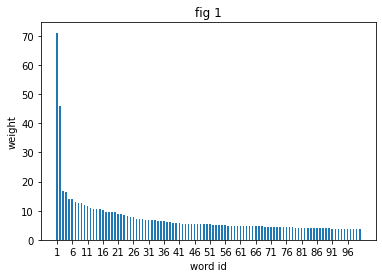

前100高頻的字詞----------------------------------------------
1 的 317883
2 有 202811
3 是 100613
4 沒 93778
5 嗎 89875
6 八卦 79119
7 了 77440
8 都 64114
9 你 62915
10 人 61440
11 在 58795
12 什麼 57760
13 我 49063
14 就 47754
15 好 42804
16 要 37354
17 不 36863
18 說 36650
19 台灣 35851
20 去 35677
21 會 34672
22 跟 33271
23 怎麼 33196
24 為 30834
25 很 30177
26 被 29440
27 啊 28361
28 也 24678
29 吃 23985
30 可以 23236
31 肥宅 21771
32 是不是 21560
33 到 20970
34 想 20654
35 來 17310
36 看 17205
37 真的 16890
38 後 16327
39 錢 16233
40 吧 15816
41 幹 15569
42 他 15073
43 比 14422
44 知道 14114
45 才 13961
46 辦 13953
47 自己 13560
48 多 13232
49 誰 12948
50 不是 11943
51 上 11729
52 阿 11405
53 現在 11279
54 買 11229
55 就是 11021
56 啦 10920
57 最 10769
58 不會 10751
59 如果 10690
60 還是 10589
61 一個 10535
62 對 10517
63 喔 10494
64 把 10354
65 該 10303
66 中國 10230
67 一堆 10098
68 用 9689
69 這樣 9671
70 有人 9666
71 做 9545
72 又 9517
73 話 9276
74 較 8957
75 和 8940
76 怎樣 8861
77 時候 8806
78 女生 8630
79 日本 8594
80 聽 8523
81 一樣 8514
82 到底 8471
83 得 8300
84 不要 8245
85 讓 8241
86 打

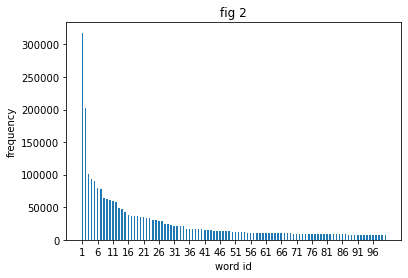

In [70]:
#畫圖
import matplotlib.pyplot as plt
import numpy as np

#fig.1 權重
fig1_x=[]
fig1_y=[]

print("前100大tf-idf-----------------------------------------------")
for i in range(100):  
    word, count = items2[i]  
    fig1_x.append(i+1)
    fig1_y.append(count)
    print (i+1,word,count)

plt.bar(fig1_x,fig1_y,align='center',width=0.5)
plt.title('fig 1')
my_x_ticks = np.arange(1, 101, 5) #顯示範圍為 1-100,刻度每5格顯示
plt.xticks(my_x_ticks)
plt.xlabel('word id')
plt.ylabel('weight')
plt.show()


#fig.2 出現頻率
fig2_x=[]
fig2_y=[]

print ("前100高頻的字詞----------------------------------------------")
for i in range(100):  
    word, count = items[i]  
    fig2_x.append(i+1)
    fig2_y.append(count)
    print (i+1,word,count)

plt.bar(fig2_x,fig2_y,align='center',width=0.5)
plt.title('fig 2')
my_x_ticks = np.arange(1, 101, 5) #顯示範圍為 1-100,刻度每5格顯示
plt.xticks(my_x_ticks)
plt.xlabel('word id')
plt.ylabel('frequency')
plt.show()